# Analisi dei Dataset di Auto Usate

Questo notebook analizza due dataset di auto usate:
1. **vehicles.csv** - Craigslist Cars & Trucks Data
2. **used_cars_data.csv** - US Used Cars Dataset

Per ciascuna sorgente analizzeremo:
- La percentuale di valori nulli per ciascun attributo
- Il numero di valori unici per ciascun attributo

## 1. Import delle Librerie

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione per la visualizzazione
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Librerie importate con successo!")

Librerie importate con successo!


## 2. Caricamento dei Dataset

In [25]:
# Caricamento Dataset 1: Craigslist Cars & Trucks
df_vehicles = pd.read_csv('dataset/craigslist.csv')
print("Dataset 1 - Craigslist:")
print(f"  Dimensioni: {df_vehicles.shape[0]} righe, {df_vehicles.shape[1]} colonne")

# Caricamento Dataset 2: US Used Cars
df_used_cars = pd.read_csv('dataset/used_cars.csv')
print("\nDataset 2 - Used Cars (US):")
print(f"  Dimensioni: {df_used_cars.shape[0]} righe, {df_used_cars.shape[1]} colonne")

Dataset 1 - Vehicles (Craigslist):
  Dimensioni: 426880 righe, 26 colonne


C:\Users\migli\AppData\Local\Temp\ipykernel_28168\763198098.py:7: DtypeWarning: Columns (0: dealer_zip) have mixed types. Specify dtype option on import or set low_memory=False.
  df_used_cars = pd.read_csv('dataset/used_cars.csv')



Dataset 2 - Used Cars (US):
  Dimensioni: 3000040 righe, 66 colonne


## 3. Esplorazione Iniziale dei Dati

In [26]:
print("=" * 80)
print("DATASET 1: VEHICLES (Craigslist)")
print("=" * 80)
print("\nPrime 5 righe:")
display(df_vehicles.head())
print("\nInformazioni sul dataset:")
df_vehicles.info()

DATASET 1: VEHICLES (Craigslist)

Prime 5 righe:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN



Informazioni sul dataset:
<class 'pandas.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  str    
 2   region        426880 non-null  str    
 3   region_url    426880 non-null  str    
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  str    
 7   model         421603 non-null  str    
 8   condition     252776 non-null  str    
 9   cylinders     249202 non-null  str    
 10  fuel          423867 non-null  str    
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  str    
 13  transmission  424324 non-null  str    
 14  VIN           265838 non-null  str    
 15  drive         296313 non-null  str    
 16  size          120519 non-null  str    
 17  type          334022 non-null  s

In [27]:
print("=" * 80)
print("DATASET 2: USED CARS (US)")
print("=" * 80)
print("\nPrime 5 righe:")
display(df_used_cars.head())
print("\nInformazioni sul dataset:")
df_used_cars.info()

DATASET 2: USED CARS (US)

Prime 5 righe:


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,NaN,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,NaN,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020



Informazioni sul dataset:
<class 'pandas.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      str    
 1   back_legroom             str    
 2   bed                      str    
 3   bed_height               str    
 4   bed_length               str    
 5   body_type                str    
 6   cabin                    str    
 7   city                     str    
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              str    
 13  engine_cylinders         str    
 14  engine_displacement      float64
 15  engine_type              str    
 16  exterior_color           str    
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           str  

## 4. Analisi Valori Nulli - Dataset 1 (Vehicles)

In [28]:
# Calcolo valori nulli e percentuali per Dataset 1
null_counts_v = df_vehicles.isnull().sum()
null_percentage_v = (null_counts_v / len(df_vehicles)) * 100

# Creazione DataFrame riassuntivo
null_analysis_v = pd.DataFrame({
    'Attributo': null_counts_v.index,
    'Valori Nulli': null_counts_v.values,
    'Percentuale (%)': null_percentage_v.values
}).sort_values('Percentuale (%)', ascending=False)

print("DATASET 1 - Analisi Valori Nulli:")
print("=" * 70)
display(null_analysis_v)

# Statistiche generali
print(f"\nAttributi con valori nulli: {(null_counts_v > 0).sum()} / {len(null_counts_v)}")
print(f"Percentuale media di valori nulli: {null_percentage_v.mean():.2f}%")

DATASET 1 - Analisi Valori Nulli:


,Attributo,Valori Nulli,Percentuale (%)
21,county,426880,100.000000
16,size,306361,71.767476
9,cylinders,177678,41.622470
8,condition,174104,40.785232
14,VIN,161042,37.725356
15,drive,130567,30.586347
18,paint_color,130203,30.501078
17,type,92858,21.752717
6,manufacturer,17646,4.133714
12,title_status,8242,1.930753



Attributi con valori nulli: 20 / 26
Percentuale media di valori nulli: 14.91%


## 5. Analisi Valori Nulli - Dataset 2 (Used Cars)

In [29]:
# Calcolo valori nulli e percentuali per Dataset 2
null_counts_uc = df_used_cars.isnull().sum()
null_percentage_uc = (null_counts_uc / len(df_used_cars)) * 100

# Creazione DataFrame riassuntivo
null_analysis_uc = pd.DataFrame({
    'Attributo': null_counts_uc.index,
    'Valori Nulli': null_counts_uc.values,
    'Percentuale (%)': null_percentage_uc.values
}).sort_values('Percentuale (%)', ascending=False)

print("DATASET 2 - Analisi Valori Nulli:")
print("=" * 70)
display(null_analysis_uc)

# Statistiche generali
print(f"\nAttributi con valori nulli: {(null_counts_uc > 0).sum()} / {len(null_counts_uc)}")
print(f"Percentuale media di valori nulli: {null_percentage_uc.mean():.2f}%")

DATASET 2 - Analisi Valori Nulli:


,Attributo,Valori Nulli,Percentuale (%)
30,is_certified,3000040,100.000000
9,combine_fuel_economy,3000040,100.000000
60,vehicle_damage_category,3000040,100.000000
2,bed,2980472,99.347742
6,cabin,2936507,97.882262
33,is_oemcpo,2864678,95.487993
31,is_cpo,2817142,93.903481
4,bed_length,2570942,85.696924
3,bed_height,2570942,85.696924
46,owner_count,1517013,50.566426



Attributi con valori nulli: 49 / 66
Percentuale media di valori nulli: 21.32%


## 6. Visualizzazione Valori Nulli

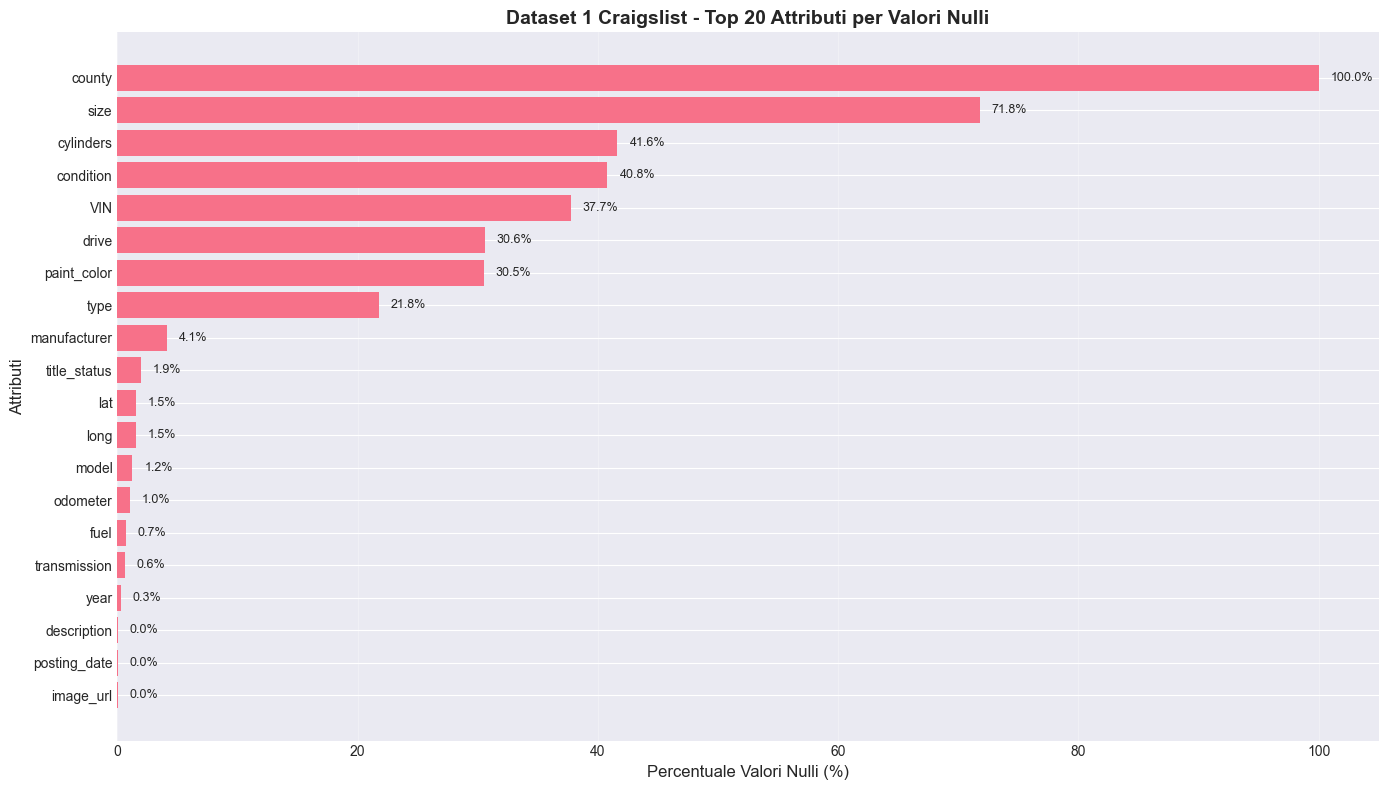

In [31]:
# Visualizzazione per Dataset 1
fig, ax = plt.subplots(figsize=(14, 8))
top_nulls_v = null_analysis_v.head(20)  # Top 20 attributi con più valori nulli
bars = ax.barh(top_nulls_v['Attributo'], top_nulls_v['Percentuale (%)'])
ax.set_xlabel('Percentuale Valori Nulli (%)', fontsize=12)
ax.set_ylabel('Attributi', fontsize=12)
ax.set_title('Dataset 1 Craigslist - Top 20 Attributi per Valori Nulli', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Inverte l'ordine delle barre

# Aggiungi valori sulle barre
for i, (bar, val) in enumerate(zip(bars, top_nulls_v['Percentuale (%)'])):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

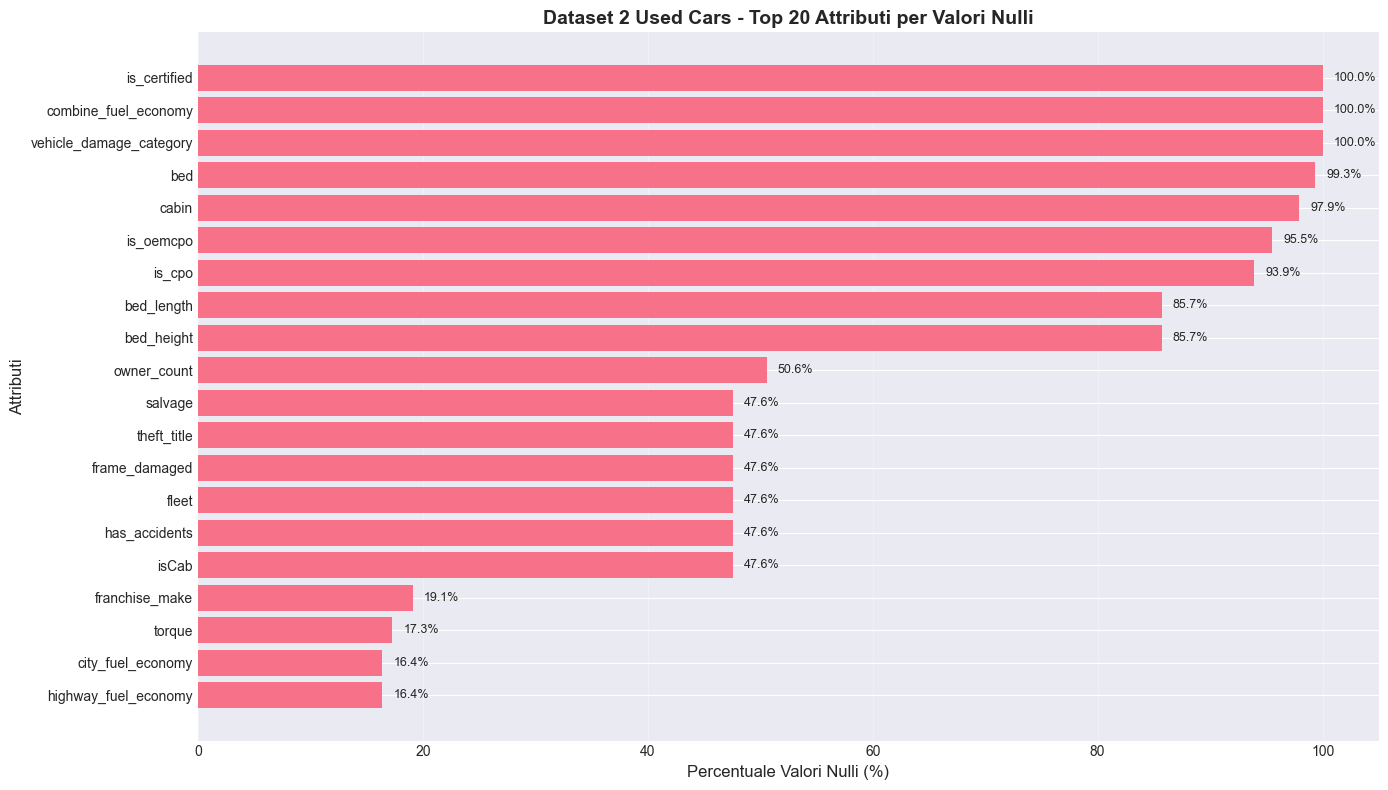

In [37]:
# Visualizzazione per Dataset 2
fig, ax = plt.subplots(figsize=(14, 8))
top_nulls_uc = null_analysis_uc.head(20)  # Top 20 attributi con più valori nulli
bars = ax.barh(top_nulls_uc['Attributo'], top_nulls_uc['Percentuale (%)'])
ax.set_xlabel('Percentuale Valori Nulli (%)', fontsize=12)
ax.set_ylabel('Attributi', fontsize=12)
ax.set_title('Dataset 2 Used Cars - Top 20 Attributi per Valori Nulli', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Inverte l'ordine delle barre

# Aggiungi valori sulle barre
for i, (bar, val) in enumerate(zip(bars, top_nulls_uc['Percentuale (%)'])):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 7. Analisi Valori Unici - Dataset 1 (Vehicles)

In [38]:
# Calcolo valori unici per Dataset 1
unique_counts_v = df_vehicles.nunique()
unique_percentage_v = (unique_counts_v / len(df_vehicles)) * 100

# Creazione DataFrame riassuntivo
unique_analysis_v = pd.DataFrame({
    'Attributo': unique_counts_v.index,
    'Valori Unici': unique_counts_v.values,
    'Percentuale Unicità (%)': unique_percentage_v.values,
    'Tipo': df_vehicles.dtypes.values
}).sort_values('Valori Unici', ascending=False)

print("DATASET 1 - Analisi Valori Unici:")
print("=" * 70)
display(unique_analysis_v)

# Statistiche generali
print(f"\nMedia valori unici per attributo: {unique_counts_v.mean():.0f}")
print(f"Attributi con alta cardinalità (>50% unicità): {(unique_percentage_v > 50).sum()}")

DATASET 1 - Analisi Valori Unici:


,Attributo,Valori Unici,Percentuale Unicità (%),Tipo
0,id,426880,100.000000,int64
1,url,426880,100.000000,str
25,posting_date,381536,89.377811,str
20,description,360911,84.546243,str
19,image_url,241899,56.666745,str
14,VIN,118264,27.704273,str
11,odometer,104870,24.566623,float64
24,long,53772,12.596514,float64
23,lat,53181,12.458068,float64
7,model,29667,6.949728,str



Media valori unici per attributo: 85177
Attributi con alta cardinalità (>50% unicità): 5


## 8. Analisi Valori Unici - Dataset 2 (Used Cars)

In [39]:
# Calcolo valori unici per Dataset 2
unique_counts_uc = df_used_cars.nunique()
unique_percentage_uc = (unique_counts_uc / len(df_used_cars)) * 100

# Creazione DataFrame riassuntivo
unique_analysis_uc = pd.DataFrame({
    'Attributo': unique_counts_uc.index,
    'Valori Unici': unique_counts_uc.values,
    'Percentuale Unicità (%)': unique_percentage_uc.values,
    'Tipo': df_used_cars.dtypes.values
}).sort_values('Valori Unici', ascending=False)

print("DATASET 2 - Analisi Valori Unici:")
print("=" * 70)
display(unique_analysis_uc)

# Statistiche generali
print(f"\nMedia valori unici per attributo: {unique_counts_uc.mean():.0f}")
print(f"Attributi con alta cardinalità (>50% unicità): {(unique_percentage_uc > 50).sum()}")

DATASET 2 - Analisi Valori Unici:


,Attributo,Valori Unici,Percentuale Unicità (%),Tipo
0,vin,3000000,99.998667,str
38,listing_id,3000000,99.998667,int64
12,description,2519325,83.976380,str
40,main_picture_url,2415855,80.527426,str
41,major_options,279972,9.332276,str
44,mileage,197577,6.585812,float64
48,price,88861,2.961994,float64
28,interior_color,45725,1.524146,str
58,trimId,41329,1.377615,str
16,exterior_color,28664,0.955454,str



Media valori unici per attributo: 178269
Attributi con alta cardinalità (>50% unicità): 4


## 9. Visualizzazione Valori Unici

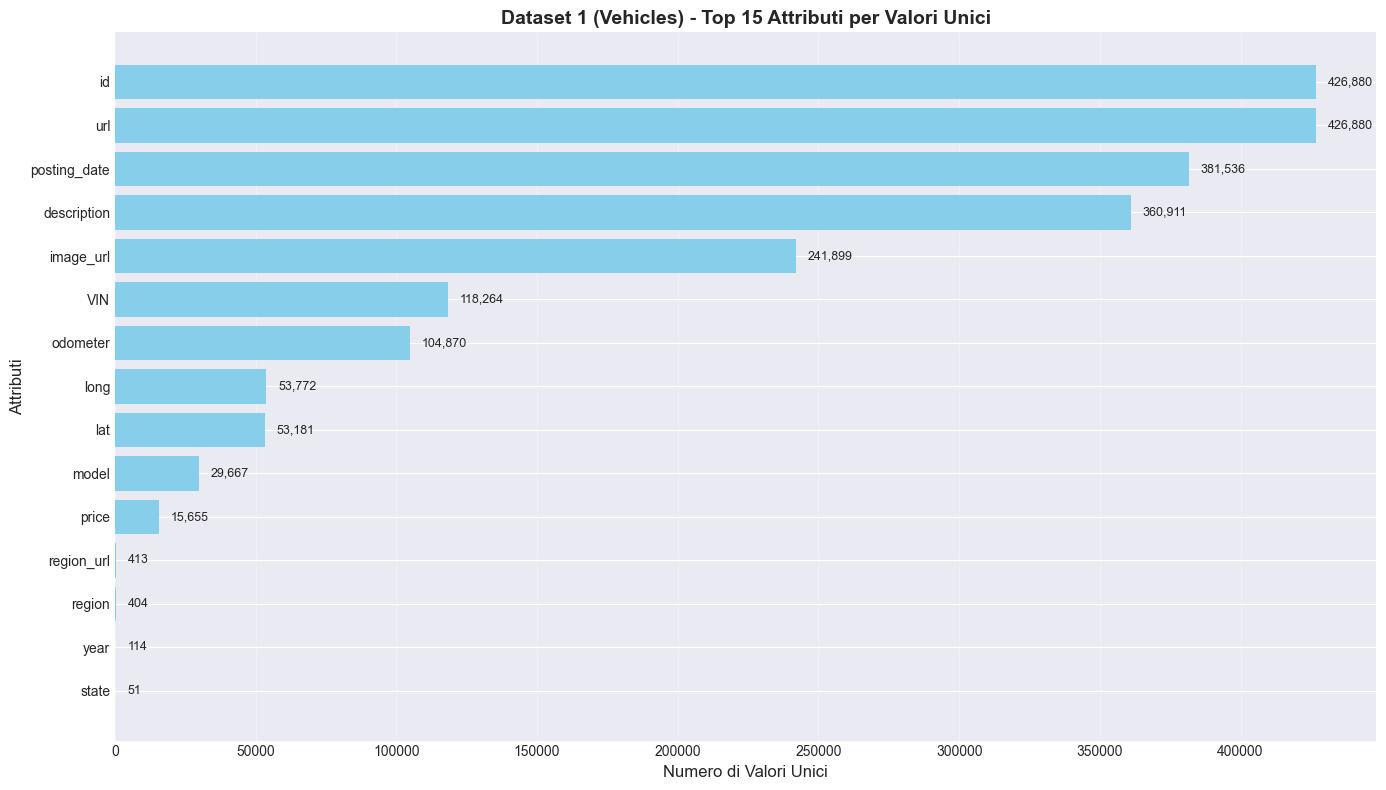

In [ ]:
# Visualizzazione per Dataset 1 - Grafico a barre
fig, ax = plt.subplots(figsize=(14, 8))
top_unique_v = unique_analysis_v.head(15)
bars = ax.barh(top_unique_v['Attributo'], top_unique_v['Valori Unici'], color='skyblue')
ax.set_xlabel('Numero di Valori Unici', fontsize=12)
ax.set_ylabel('Attributi', fontsize=12)
ax.set_title('Dataset 1 (Craigslist) - Top 15 Attributi per Valori Unici', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Inverte l'ordine delle barre

# Aggiungi valori sulle barre
for bar, val in zip(bars, top_unique_v['Valori Unici']):
    ax.text(val + max(top_unique_v['Valori Unici'])*0.01, 
            bar.get_y() + bar.get_height()/2, 
            f'{val:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

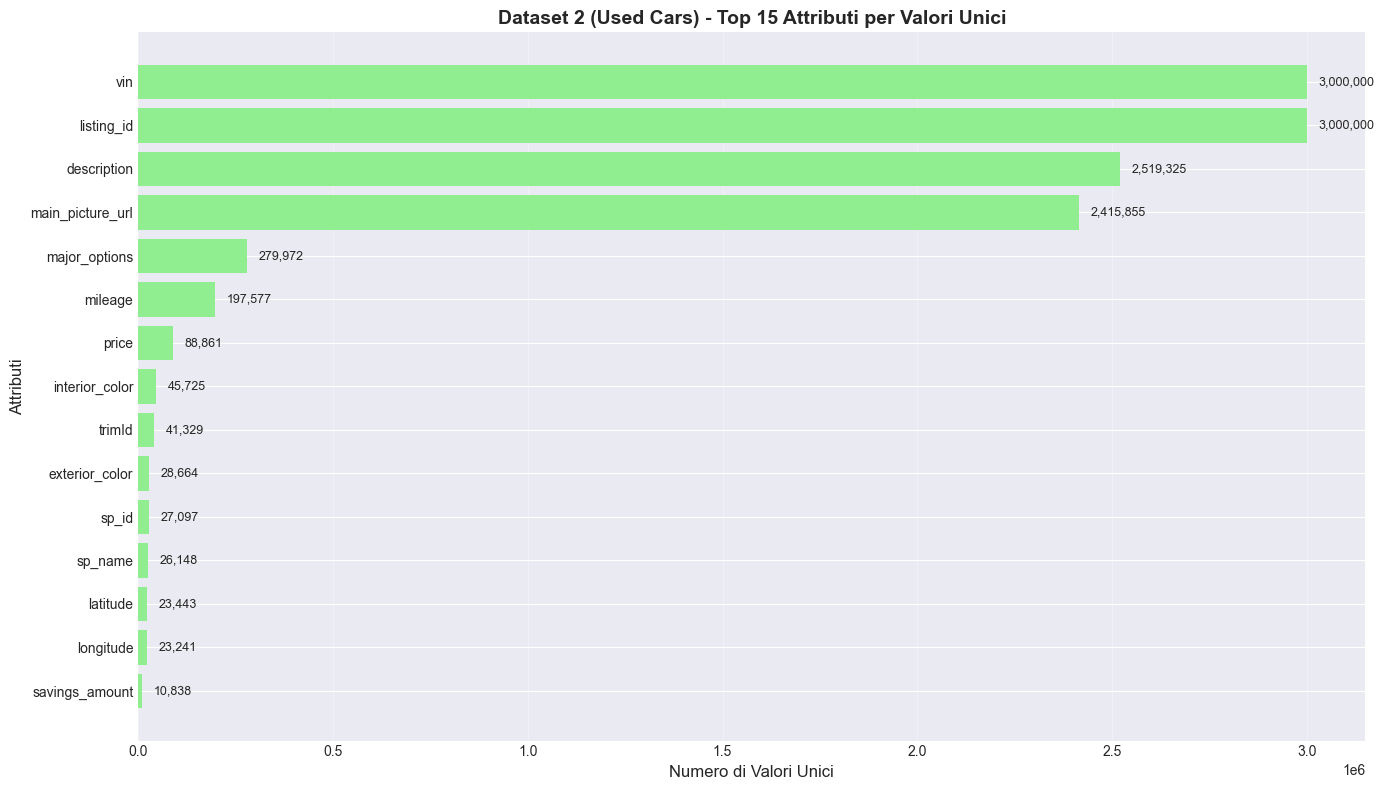

In [41]:
# Visualizzazione per Dataset 2 - Grafico a barre
fig, ax = plt.subplots(figsize=(14, 8))
top_unique_uc = unique_analysis_uc.head(15)
bars = ax.barh(top_unique_uc['Attributo'], top_unique_uc['Valori Unici'], color='lightgreen')
ax.set_xlabel('Numero di Valori Unici', fontsize=12)
ax.set_ylabel('Attributi', fontsize=12)
ax.set_title('Dataset 2 (Used Cars) - Top 15 Attributi per Valori Unici', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Inverte l'ordine delle barre

# Aggiungi valori sulle barre
for bar, val in zip(bars, top_unique_uc['Valori Unici']):
    ax.text(val + max(top_unique_uc['Valori Unici'])*0.01, 
            bar.get_y() + bar.get_height()/2, 
            f'{val:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 10. Report Riassuntivo Completo - Dataset 1 (Vehicles)

In [42]:
# Report completo per Dataset 1
summary_v = pd.DataFrame({
    'Attributo': df_vehicles.columns,
    'Tipo': df_vehicles.dtypes.values,
    'Valori Nulli': null_counts_v.values,
    'Null %': null_percentage_v.values.round(2),
    'Valori Unici': unique_counts_v.values,
    'Unicità %': unique_percentage_v.values.round(2)
})

print("REPORT COMPLETO - DATASET 1 (VEHICLES)")
print("=" * 100)
print(f"Totale righe: {len(df_vehicles):,}")
print(f"Totale colonne: {len(df_vehicles.columns)}")
print("\n")
display(summary_v.sort_values('Null %', ascending=False))

REPORT COMPLETO - DATASET 1 (VEHICLES)
Totale righe: 426,880
Totale colonne: 26




,Attributo,Tipo,Valori Nulli,Null %,Valori Unici,Unicità %
21,county,float64,426880,100.00,0,0.00
16,size,str,306361,71.77,4,0.00
9,cylinders,str,177678,41.62,8,0.00
8,condition,str,174104,40.79,6,0.00
14,VIN,str,161042,37.73,118264,27.70
15,drive,str,130567,30.59,3,0.00
18,paint_color,str,130203,30.50,12,0.00
17,type,str,92858,21.75,13,0.00
6,manufacturer,str,17646,4.13,42,0.01
12,title_status,str,8242,1.93,6,0.00


## 11. Report Riassuntivo Completo - Dataset 2 (Used Cars)

In [43]:
# Report completo per Dataset 2
summary_uc = pd.DataFrame({
    'Attributo': df_used_cars.columns,
    'Tipo': df_used_cars.dtypes.values,
    'Valori Nulli': null_counts_uc.values,
    'Null %': null_percentage_uc.values.round(2),
    'Valori Unici': unique_counts_uc.values,
    'Unicità %': unique_percentage_uc.values.round(2)
})

print("REPORT COMPLETO - DATASET 2 (USED CARS)")
print("=" * 100)
print(f"Totale righe: {len(df_used_cars):,}")
print(f"Totale colonne: {len(df_used_cars.columns)}")
print("\n")
display(summary_uc.sort_values('Null %', ascending=False))

REPORT COMPLETO - DATASET 2 (USED CARS)
Totale righe: 3,000,040
Totale colonne: 66




,Attributo,Tipo,Valori Nulli,Null %,Valori Unici,Unicità %
30,is_certified,float64,3000040,100.00,0,0.00
9,combine_fuel_economy,float64,3000040,100.00,0,0.00
60,vehicle_damage_category,float64,3000040,100.00,0,0.00
2,bed,str,2980472,99.35,3,0.00
6,cabin,str,2936507,97.88,4,0.00
33,is_oemcpo,object,2864678,95.49,1,0.00
31,is_cpo,object,2817142,93.90,1,0.00
4,bed_length,str,2570942,85.70,83,0.00
3,bed_height,str,2570942,85.70,1,0.00
46,owner_count,float64,1517013,50.57,18,0.00


## 12. Salvataggio Report

In [44]:
import os
from datetime import datetime

# Crea la cartella report se non esiste
os.makedirs('report/analisi_iniziale', exist_ok=True)

# Salvataggio report Dataset 1
summary_v.to_csv('report/analisi_iniziale/report_vehicles.csv', index=False)
print("✓ Report Dataset 1 salvato in: report/analisi_iniziale/report_vehicles.csv")

# Salvataggio report Dataset 2
summary_uc.to_csv('report/analisi_iniziale/report_used_cars.csv', index=False)
print("✓ Report Dataset 2 salvato in: report/analisi_iniziale/report_used_cars.csv")

# Salvataggio report combinato
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
with open(f'report/analisi_iniziale/summary_report_{timestamp}.txt', 'w', encoding='utf-8') as f:
    f.write("=" * 100 + "\n")
    f.write("REPORT ANALISI INIZIALE DATASET AUTO USATE\n")
    f.write(f"Generato il: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("=" * 100 + "\n\n")
    
    f.write("DATASET 1 - VEHICLES (Craigslist)\n")
    f.write("-" * 100 + "\n")
    f.write(f"Totale righe: {len(df_vehicles):,}\n")
    f.write(f"Totale colonne: {len(df_vehicles.columns)}\n")
    f.write(f"Attributi con valori nulli: {(null_counts_v > 0).sum()} / {len(null_counts_v)}\n")
    f.write(f"Percentuale media valori nulli: {null_percentage_v.mean():.2f}%\n")
    f.write(f"Media valori unici per attributo: {unique_counts_v.mean():.0f}\n\n")
    
    f.write("DATASET 2 - USED CARS (US)\n")
    f.write("-" * 100 + "\n")
    f.write(f"Totale righe: {len(df_used_cars):,}\n")
    f.write(f"Totale colonne: {len(df_used_cars.columns)}\n")
    f.write(f"Attributi con valori nulli: {(null_counts_uc > 0).sum()} / {len(null_counts_uc)}\n")
    f.write(f"Percentuale media valori nulli: {null_percentage_uc.mean():.2f}%\n")
    f.write(f"Media valori unici per attributo: {unique_counts_uc.mean():.0f}\n\n")

print(f"✓ Report riassuntivo salvato in: report/analisi_iniziale/summary_report_{timestamp}.txt")
print("\nTutti i report sono stati salvati con successo!")

✓ Report Dataset 1 salvato in: report/analisi_iniziale/report_vehicles.csv
✓ Report Dataset 2 salvato in: report/analisi_iniziale/report_used_cars.csv
✓ Report riassuntivo salvato in: report/analisi_iniziale/summary_report_20260202_004217.txt

Tutti i report sono stati salvati con successo!


## 13. Conclusioni

### Dataset 1 - Vehicles (Craigslist)
- Caratteristiche principali identificate dall'analisi dei valori nulli e unici
- Qualità dei dati e completezza

### Dataset 2 - Used Cars (US)
- Caratteristiche principali identificate dall'analisi dei valori nulli e unici
- Qualità dei dati e completezza

### Prossimi Passi
- Data cleaning basato sui risultati dell'analisi
- Gestione dei valori mancanti
- Feature engineering

### Output Generati
- Report CSV per ciascun dataset salvati in `report/analisi_iniziale/`
- Report riassuntivo testuale con timestamp